<a href="https://colab.research.google.com/github/bdfd/Portfolio_Project_12-Position_Salary_Prediction/blob/main/Position_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Position Salary Prediction

## Basic Approach

The Approach
1. Perform some quick EDA(Exploratory Data Analysis)
2. Use Scikit-Learn Polynomial Regression Algorithm
3. Covert data into an array
4. Converting the target variable into Polynomial Expression Function

Classification Model:
  *   1. Linear Regression 
  *   2. Polynomial Regression 
  *   3. Support Vector Machine

Target Cluster Datasets is about a set of data regarding about profit based on  following fields.  

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Position    | various position inside company depends on different departments                                    |
| Level      | level based on corresponding position            |
| Salary      | Salary based on corresponding position                  |

In [1]:
# import necessary packages
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset
data_path = 'https://raw.githubusercontent.com/bdfd/Portfolio_Project_12-Position_Salary_Prediction/main/dataset/Position_Salaries.csv'
# upload dataset into data frame
df = pd.read_csv(data_path)
df.head(3)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000


In [3]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

## Linear Regression Prediction

In [6]:
# from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(X, y)

LinearRegression()

In [7]:
reg_model.score(X, y)

0.6690412331929895

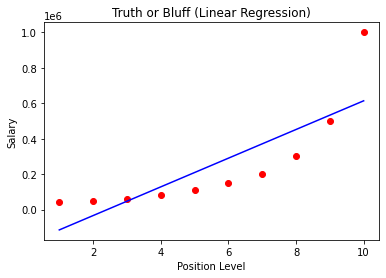

In [8]:
plt.scatter(X, y, color = 'red')
plt.plot(X, reg_model.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Polynomial Regression Prediction

In [9]:
poly_model = PolynomialFeatures(degree=4)
X_poly = poly_model.fit_transform(X)
reg2_model = LinearRegression()
reg2_model.fit(X_poly, y)
reg2_model.score(X_poly, y)

0.9973922891706615

In [10]:
result = [];
for n in range (1,7):
  poly_model = PolynomialFeatures(degree=n)
  X_poly = poly_model.fit_transform(X)
  reg2_model = LinearRegression()
  reg2_model.fit(X_poly, y)
  reg2_model.score(X_poly, y)


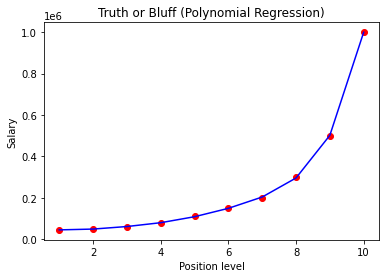

In [11]:
plt.scatter(X, y, color = 'red')
plt.plot(X, reg2_model.predict(poly_model.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Support Vector Machine Prediction

In [12]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X,y)

DecisionTreeRegressor()

In [13]:
# Train the decision tree regression model on whole dataset and predict a new result with linear regression
tree_model.predict([[6.5]])

array([150000.])

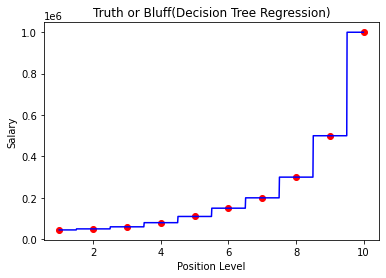

In [16]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X, y, color ='red')
plt.plot(X_grid, tree_model.predict(X_grid), color='blue')
plt.title('Truth or Bluff(Decision Tree Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()